In [ ]:
## in this notebook, I will try to recreate the methods and performance of this kernel:
## https://www.kaggle.com/tmdb/tmdb-movie-metadata/discussion/28576

#other useful things to read:
## logistic regression: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
## "liblinear" logistic regression: https://www.csie.ntu.edu.tw/~cjlin/liblinear/

In [1]:
#import all the stuff you need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast
from datetime import datetime as dt
from scipy.optimize import curve_fit

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

from data_preprocessing import preprocessing

In [2]:
# try out the library function:
train = preprocessing()
train.head()

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

#----------------------------------------#

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'cast_df', 'crew_df', 'release_datetime', 'categorical_revenue'],
      dtype='object')


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,tagline,title,Keywords,cast,crew,revenue,cast_df,crew_df,release_datetime,categorical_revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",2015-02-20,2.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",2004-08-06,5.0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",2014-10-10,2.0
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",1987-08-06,1.0
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",2012-08-30,5.0


In [ ]:
# trying things out...
"""
features:

- here are the features he uses:
    - duration x
    - face number in poster.
        {an old column.}
    - budget x
    - title year x
        {need to get the date and then extract the year later.}
    - imdb score x
    - * director history gross [new] 
    - * actor history average gross [new]
    - * director history score [new]
    - * actor average history score [new]
    - * director movies (number?) [new]
    - * actor total movies [new]

    - color ?
    - language x
    - content rating ?
    - aspect ratio
    - genre x

** I don't actually know how the [new] features are being created, did he crawl them from IMDB / 
    {we need to use tmdb!} ?
 - you will have to crawl (for each actor) their movies and the dates when they starred in those movies.
 - then you will have to crawl those movies' grosses and scores.

"""



In [68]:
### training sample data: use this if you want to try out the functions on a smaller sample set:

# need to create a function that will set up smaller datasets for testing.
'''

def trdata(train):
    sample = train.head()
    y = sample.apply(f1, axis=1)
    actor_movie = pd.concat(y.__iter__())
    #add some stuff to test functionality when there are duplicates.
    actor_movie = actor_movie.replace(['Melissa Benoist', 'Vidya Balan', 'Chevy Chase'], 'Anne Hathaway')
    actor_movie = actor_movie.replace('Miles Teller', 'Craig Robinson')
    actor_movie['actor_id'] = actor_movie['actor_id'].replace([54812, 129104, 35068], 1813)
    actor_movie['actor_id'] = actor_movie['actor_id'].replace(996701, 64342)
    return sample, actor_movie

sample=None
actor_movie_sample=None
sample, actor_movie_sample = trdata(train)
'''

In [3]:
'''
    here, create the new columns:
    1. actor history avg gross 
    2. actor history avg popularity
    3. actor total movies (averaged)
    
    3. director history gross
    4. director history score
    5. director movies
    
    note: currently, these columns are being created by only using the data within this dataset. If we really wanted
    something a lot more complete, we would have to use entire catalog of tmdb and do some crawling.
'''

# this function, applied to the training dataframe, "explodes" the cast json object.
def f_explode_actors(x):
    df0 = {'actor_name':[], 'actor_id':[], 'movie_id':[], 'release_datetime':[], 'revenue':[], 'popularity':[]}
    cast = x['cast_df']
    if cast is None:
        return None
    for i in range(5):
        #add cast[i]
        if i >= len(cast):
            break
        c = cast[i]
        df0['actor_name'].append(c['name'])
        df0['actor_id'].append(c['id'])
        df0['movie_id'].append(x['id'])
        df0['release_datetime'].append(x['release_datetime'])
        df0['revenue'].append(x['revenue'])
        df0['popularity'].append(x['popularity'])
    #convert
    df = pd.DataFrame(df0)
    if len(df) > 0:
        return df
    return None

# this function, applied to the training dataframe, "explodes" the crew json object & extracts directors.
def f_explode_directors(x):
    df0 = {'director_name':[], 'director_id':[], 'movie_id':[], 'release_datetime':[], 'revenue':[], 'popularity':[]}
    crew = x['crew_df']
    if crew is None:
        return None
    for i in range(len(crew)):
        #add cast[i]
        if i >= len(crew):
            break
        c = crew[i]
        if c['job'].lower() != 'director':
            continue
        
        df0['director_name'].append(c['name'])
        df0['director_id'].append(c['id'])
        df0['movie_id'].append(x['id'])
        df0['release_datetime'].append(x['release_datetime'])
        df0['revenue'].append(x['revenue'])
        df0['popularity'].append(x['popularity'])
        break
    #convert
    df = pd.DataFrame(df0)
    if len(df) > 0:
        return df
    return None


#this function will create the columns "actor_history_average_gross", "actor_history_avg_popularity",
# "actor_movies"
def actor_history_avg_cols(actor_movie, train):
    #join actor movie with itself, and filter out all the rows where movie 1 came out before movie 2
    y0 = pd.merge(actor_movie, actor_movie, on='actor_id')
    y1 = y0[(y0.release_datetime_x > y0.release_datetime_y)]

    #next, do a group-by and perform a mean: this gives me the historical mean gross for every actor in every movie. 
    y2 = y1[['actor_id','movie_id_x','revenue_y', 'popularity_y']].groupby(['actor_id', 'movie_id_x']).mean()
    #   aggregate the total movies as a count. This will become a new variable.
    y_ct = y1[['actor_id', 'movie_id_x', 'actor_name_x']].groupby(['actor_id', 'movie_id_x']).count()
    y_ct.columns = ['actor_total_movies']
    y2 = pd.merge(y2, y_ct, on=['actor_id', 'movie_id_x'])
    
    #do another aggregation: take the mean of all the box office grosses of all actors for a single movie.
    y3 = y2.groupby('movie_id_x').sum()/5 #take the mean(divide by 5 since we're only considering the top 5.)
    y3.index.name='id'
    y3.columns=['actor_history_avg_gross', 'actor_history_avg_popularity', 'actor_total_movies_avg']
    y3.reset_index(level='id', inplace=True)
    
    # the next step is to join this back with the full training data.
    train = pd.merge(train, y3, on='id')
    return train

#extract the director "new columns":
def director_history_avg_cols(director_movie, train):
    #join director movie with itself, and filter out all the rows where movie 1 came out before movie 2
    y0 = pd.merge(director_movie, director_movie, on='director_id')
    y1 = y0[(y0.release_datetime_x > y0.release_datetime_y)]

    #next, do a group-by and perform a mean: this gives me the historical mean gross for every director-movie combo. 
    y2 = y1[['director_id','movie_id_x','revenue_y', 'popularity_y']].groupby(['director_id', 'movie_id_x']).mean()
    y2.columns = ['director_history_gross', 'director_history_score']
    #   aggregate the total movies as a count. This will become a new variable.
    y_ct = y1[['director_id', 'movie_id_x', 'director_name_x']].groupby(['director_id', 'movie_id_x']).count()
    y_ct.columns = ['director_total_movies']
    y3 = pd.merge(y2, y_ct, on=['director_id', 'movie_id_x'])
    
    # the next step is to join this back with the full training data.
    y3.reset_index(level='director_id', inplace=True)
    y3.index.name='id'
    y3.reset_index(level='id', inplace=True)
    train = pd.merge(train, y3, on='id')
    return train


#go through the entire training dataframe and "explode" each cast json. Then, combine all the results.
y = train.apply(f_explode_actors, axis=1)
actor_movie = pd.concat(y.__iter__())
#add actor new columns.
train = actor_history_avg_cols(actor_movie, train)

#repeat the above for directors.
y = train.apply(f_explode_directors, axis=1)
director_movie = pd.concat(y.__iter__())
train = director_history_avg_cols(director_movie, train)
train.head()


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,cast_df,crew_df,release_datetime,actor_history_avg_gross,actor_history_avg_popularity,actor_total_movies_avg,director_id,director_history_gross,director_history_score,director_total_movies
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",2015-02-20,3.725818e+07,6.857819,3.4,3227,43753846.5,8.301942,2
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",2004-08-06,1.695728e+08,7.728887,2.2,1201,134669024.5,9.202188,4
2,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",2012-08-30,1.958431e+07,2.619313,1.6,22676,1179002.0,6.122067,1
3,14,"[{'id': 91698, 'name': 'Chili Palmer Collectio...",53000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...",NaN,tt0377471,en,Be Cool,"Disenchanted with the movie industry, Chili Pa...",13.314233,...,"[{'cast_id': 4, 'character': 'Chili Palmer', '...","[{'credit_id': '52fe43cbc3a36847f807039f', 'de...",2005-03-04,7.448104e+07,7.583524,3.6,37932,82879005.0,15.426314,3
4,15,NaN,102000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt0181689,en,Minority Report,John Anderton is a top 'Precrime' cop in the l...,20.666063,...,"[{'cast_id': 5, 'character': 'Chief John Ander...","[{'credit_id': '52fe4223c3a36847f8006f3d', 'de...",2002-06-20,7.181121e+07,7.172355,2.2,488,484765149.0,12.205494,4


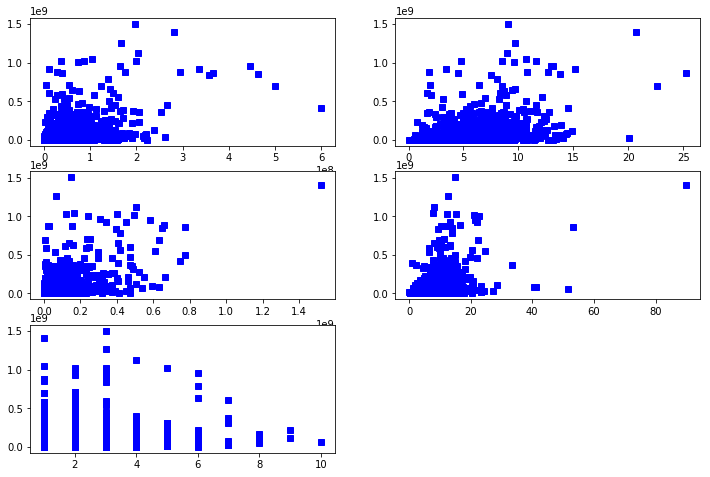

In [4]:
## the next step is to actually start the data analysis
# we should make some scatterplots or something to identify how important each variable is.

from matplotlib import pyplot as plt

# create a scatterplot of "actor_history_avg_gross" vs. gross.
# [filter out non-american movies?]
plt.figure(1, figsize=(12, 8))

plt.subplot(321)
plt.plot(train['actor_history_avg_gross'], train['revenue'], 'bs')

plt.subplot(322)
plt.plot(train['actor_history_avg_popularity'], train['revenue'], 'bs')

plt.subplot(323)
plt.plot(train['director_history_gross'], train['revenue'], 'bs')

plt.subplot(324)
plt.plot(train['director_history_score'], train['revenue'], 'bs')

plt.subplot(325)
plt.plot(train['director_total_movies'], train['revenue'], 'bs')

plt.show()

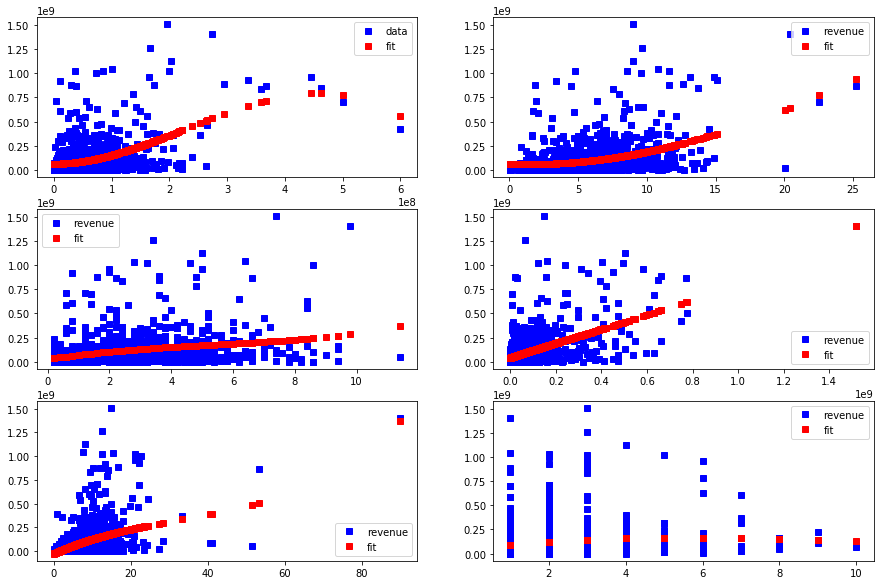

"\n    as we can see in the plot below, the new variables all seem to be decent indicators of the movie's \n    box office gross. Of course there are a few outlying values which would strongly bias a regression, but\n    those can be filtered out.\n    == we can also get an R & R^2 score to confirm if we want. [Might be a good idea.]\n        ~ I wonder which is a better indicator, this or an R^2 score? This is quite good for giving me a\n        rough idea of what the data behaves like...\n"

In [55]:
### TODO: REPLACE TRAIN_EN WITH TRAIN (FILTERING HAPPENED EARLIER)

#filter out non-hollywood films based on production language.
train = train[(train.original_language=='en')]
train = train[(train.revenue > 1)]

#try to fit a simple polynomial to each scatterplot at first.
def func(x, a, b, c, d):
    return a*(x**3) + b*(x**2) + c*(x) + d

plt.figure(1, figsize=(15, 10))

plt.subplot(321)
plt.plot(train_en['actor_history_avg_gross'], train_en['revenue'], 'bs', label='data')
x = train['actor_history_avg_gross']
y = train['revenue']
popt, pcov = curve_fit(func, x, y)
plt.plot(x, func(x, popt[0], popt[1], popt[2], popt[3]), 'rs', label='fit')
plt.legend()

plt.subplot(322)
plt.plot(train['actor_history_avg_popularity'], train_en['revenue'], 'bs')
x = train_en['actor_history_avg_popularity']
popt, pcov = curve_fit(func, x, y)
plt.plot(x, func(x, popt[0], popt[1], popt[2], popt[3]), 'rs', label='fit')
plt.legend()

plt.subplot(323)
plt.plot(train_en['actor_total_movies_avg'], train_en['revenue'], 'bs')
x = train['actor_total_movies_avg']
popt, pcov = curve_fit(func, x, y)
plt.plot(x, func(x, popt[0], popt[1], popt[2], popt[3]), 'rs', label='fit')
plt.legend()

plt.subplot(324)
plt.plot(train['director_history_gross'], train_en['revenue'], 'bs')
x = train_en['director_history_gross']
popt, pcov = curve_fit(func, x, y)
plt.plot(x, func(x, popt[0], popt[1], popt[2], popt[3]), 'rs', label='fit')
plt.legend()

plt.subplot(325)
plt.plot(train['director_history_score'], train_en['revenue'], 'bs')
x = train_en['director_history_score']
y = train_en['revenue']
popt, pcov = curve_fit(func, x, y)
plt.plot(x, func(x, popt[0], popt[1], popt[2], popt[3]), 'rs', label='fit')
plt.legend()

plt.subplot(326)
plt.plot(train['director_total_movies'], train_en['revenue'], 'bs')
x = train_en['director_total_movies']
y = train_en['revenue']
popt, pcov = curve_fit(func, x, y)
plt.plot(x, func(x, popt[0], popt[1], popt[2], popt[3]), 'rs', label='fit')
plt.legend()

plt.show()

'''
    as we can see in the plot below, the new variables all seem to be decent indicators of the movie's 
    box office gross. Of course there are a few outlying values which would strongly bias a regression, but
    those can be filtered out.
    == we can also get an R & R^2 score to confirm if we want. [Might be a good idea.]
        ~ I wonder which is a better indicator, this or an R^2 score? This is quite good for giving me a
        rough idea of what the data behaves like...
'''

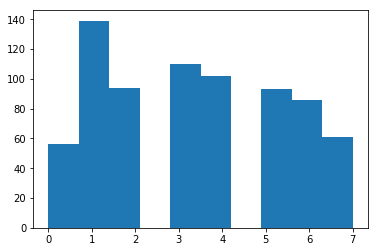

In [5]:
'''
    another step is to divide the data into nine different sections. Subsequently, each section can be 
    subjected to its own logistic regression.
    
    How did we decide on nine sections / how did we decide what the nine sections were?
        ~ seems like they were probably decided by medians.
    
'''

#create a new variable, categorical_revenue
def continuous_to_cat_rev(r):
    #create array of ranges (values in millions)
    ranges = [1, 10, 20, 40, 65, 100, 150, 200]
    ranges = [r*(10**6) for r in ranges]
    c = None
    for i in range(len(ranges)):
        if r < ranges[i]:
            c = i
            break
    return c

cr = pd.Series(train['revenue'].apply(lambda x: continuous_to_cat_rev(x)))
#change the name.
cr.name = 'categorical_revenue'
train = pd.concat([train,cr], axis=1)

#first, we want to see how well distributed this thing is.
cr = cr[cr.notna()] ##### THIS LINE IS FAILING... i THINK?
counts, bins = np.histogram(cr)
plt.hist(bins[:-1], bins, weights=counts)
plt.show()

#as we can see it seems relatively even, with slightly more movies falling into categories 3 and 4.
# we can always adjust if needed.
# why are the bins so weird?

In [48]:
#now, try to start making the logistic regressions for prediction

'''
    note: in the example kernel, the guy makes logistic regressions for each category. He uses a separate
    logistic regression for each category of revenue
    - this should be your goal.
    ~ revise logistic regression & figure out how to apply it here: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
    
    -- Things to investigate: check out the effects of normalizing vs. standardizing
        ~ I can normalize using (x-min(x))/(max(x)-min(x))
        - I can "standardize" using (x-mean)/(stddev)**
        - Standardizing really gives me a solid performance, around 58% with logistic regression.
    -- try adding in all the variables in the logistic regression
    -- read through the library and make sure you're using exactly the right library that needs to be used.
        Try playing with that function if need be.
        -- do I need to play with the training to optimize for one-away?
        -- do I need to play with the classes to make sure they're evenly distributed?
    
    -- other potential variables to improve performance:
        -- you could try adding production company. Although I feel like you also want the year included here too.
            -- Note: this could be your first non-numerical variable.
        -- I wonder how to deal with variables that are more weakly correlated, or jointly correlated? Should we
            just ignore them / manually combine them?
    
'''

# actor_history_avg_gross, actor_history_avg_popularity, actor_total_movies, director_history_gross
# director_history_score, director_total_movies

#let's try the dumb approach and see if it works

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

#take a subset of independent variables X
#dependent variables (y) = categorical revenue.
train_fnl = train.dropna(subset=['categorical_revenue']) #drop all rows where categorical revenue is NaN.
X_0 = train_fnl[['budget','runtime', 'actor_history_avg_popularity', 'actor_history_avg_gross',
               'actor_total_movies_avg', 'director_history_gross', 'director_history_score','director_total_movies']]
y = train_fnl['categorical_revenue']

#here, we can normalize X and y? Normalizing really boosted performance! From 19% to 31% "bingo" accuracy
X_scaled = preprocessing.scale(X_0, axis=0)
X = pd.DataFrame(data=X_scaled, columns=X_0.columns)

clf = LogisticRegression(random_state=0, solver='liblinear', multi_class='auto').fit(X,y)

clf.score(X, y) 

/Users/sidharth/Documents/ml/sideprojects/kaggle_env/lib/python3.7/site-packages/ipykernel_launcher.py:37: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.


0.3117408906882591

In [49]:
# try to do some cross-validation to determine the actual score of the algorithm.

#given a set of training data and inds (generated from below) return a training and test set.
# "inds" is the list of indices, and i is the index of kfoldcv we're currently at.
def kfoldcv_extract_tr_test(X, y, inds, i):
    ind = inds[i]
    X_train = X.iloc[:ind[0],:]
    y_train = y.iloc[:ind[0]]
    #look up right syntax!!!
    X_train = pd.concat([X_train, X.iloc[ind[1]:,:]])
    y_train = pd.concat([y_train, y.iloc[ind[1]:]])
    
    X_test = X.iloc[ind[0]:ind[1],:]
    y_test = y.iloc[ind[0]:ind[1]]
    return X_train, y_train, X_test, y_test
    

#make a list of tuples encoding which indices need to be used from the trset for testing.
def kfoldcv_inds(k, X, y):
    l = X['budget'].count()
    l1 = y.count()
    if l != l1:
        #throw exception
        print("Error! size of X not equal to y. Kfoldcv returning None")
        return None
    kth = int(l/k)
    inds = [i*kth for i in list(range(10))]
    
    #for each pair of elements in the list of inds, get that set of rows from X and y.
    # Use that for testing and the rest for training.
    indpairs = []
    for i in range(len(inds)-1):
        a = inds[i]
        b = inds[i+1]
        indpairs += [(a, b)]
    indpairs += [(inds[-1], l-1)]
    
    return indpairs
        
## now the result is way too inaccurate... what is going wrong?
## I need to also try the 1-away method and see how much further that gets me. 
#     == one-away is getting me up to ~47%, which is around the same accuracy from the sample kernel
#     == after standardizing, the performance went up to 58%.
    
inds = kfoldcv_inds(10, X, y)
scores = []
oneaway = []
for i in range(len(inds)):
    X_train, y_train, X_test, y_test = kfoldcv_extract_tr_test(X, y, inds, i)
    clf = LogisticRegression(random_state=0, solver='liblinear', multi_class='auto').fit(X_train, y_train)
    exact_score = clf.score(X_test, y_test)
    scores.append(exact_score)
    #calculate 1-away
    preds = clf.predict(X_test)
    a0 = sum(preds+1 == y_test)
    a1 = sum(preds-1 == y_test)
    oneaway_score = exact_score + float(a0+a1)/y_test.count()
    oneaway += [oneaway_score]
    

print(scores)
print(oneaway)
print("mean score: %f" % np.mean(scores))
print("oneaway score: %f" % np.mean(oneaway))

    
    

[0.2702702702702703, 0.2702702702702703, 0.32432432432432434, 0.28378378378378377, 0.2702702702702703, 0.22972972972972974, 0.2972972972972973, 0.21621621621621623, 0.33783783783783783, 0.24324324324324326]
[0.5675675675675675, 0.6081081081081081, 0.6486486486486487, 0.5675675675675675, 0.527027027027027, 0.5810810810810811, 0.5540540540540541, 0.527027027027027, 0.6756756756756757, 0.5405405405405406]
mean score: 0.274324
oneaway score: 0.579730


In [50]:
print(X_train.shape)
print(X_test.shape)
print(inds)

# I should doublecheck an itemized list of results...
# maybe I should try to check the area under the curve or something? I could compare AUC for two or three methods?
print("\n\ntrying to visualize the predictions more clearly...")
preds = clf.predict(X_test)
print(preds)
print(y_test)

(667, 8)
(74, 8)
[(0, 74), (74, 148), (148, 222), (222, 296), (296, 370), (370, 444), (444, 518), (518, 592), (592, 666), (666, 740)]


trying to visualize the predictions more clearly...
[3. 1. 3. 2. 1. 2. 5. 6. 2. 1. 4. 7. 4. 2. 7. 2. 6. 1. 1. 1. 3. 1. 1. 2.
 0. 3. 4. 6. 3. 1. 1. 6. 1. 4. 1. 1. 5. 1. 7. 6. 6. 7. 1. 3. 6. 5. 1. 1.
 6. 3. 6. 1. 6. 3. 1. 3. 5. 1. 5. 3. 6. 1. 6. 5. 1. 1. 2. 6. 4. 1. 1. 1.
 1. 4.]
797    3.0
798    3.0
799    4.0
800    3.0
801    7.0
803    2.0
804    1.0
805    6.0
806    1.0
807    0.0
808    2.0
809    7.0
810    4.0
811    4.0
812    7.0
814    1.0
815    6.0
816    5.0
818    1.0
819    0.0
820    5.0
821    4.0
823    1.0
824    4.0
825    3.0
827    1.0
828    7.0
829    5.0
831    5.0
832    1.0
      ... 
850    5.0
851    3.0
853    6.0
854    4.0
856    3.0
857    3.0
858    5.0
859    5.0
860    6.0
861    4.0
863    0.0
864    1.0
865    5.0
866    0.0
867    3.0
868    2.0
869    2.0
870    2.0
871    3.0
872    1.0
873    5.0
874    2.0
87

In [47]:
print(X.head())
X_scaled = preprocessing.scale(X, axis=0)
print("\n\n#--------------------------------------------#\n")
#print(X_scaled)
X_sc_df = pd.DataFrame(data=X_scaled, columns=X.columns)
print(X_sc_df.head())

     budget  runtime  actor_history_avg_popularity  actor_history_avg_gross  \
0  14000000     93.0                      6.857819             3.725818e+07   
1  40000000    113.0                      7.728887             1.695728e+08   
2  14000000     92.0                      2.619313             1.958431e+07   
3  53000000    118.0                      7.583524             7.448104e+07   
5  26000000     85.0                      6.988019             8.172772e+07   

   actor_total_movies_avg  director_history_gross  director_history_score  \
0                     3.4              43753846.5                8.301942   
1                     2.2             134669024.5                9.202188   
2                     1.6               1179002.0                6.122067   
3                     3.6              82879005.0               15.426314   
5                     1.2              46528680.0                7.058832   

   director_total_movies  
0                      2  
1       

/Users/sidharth/Documents/ml/sideprojects/kaggle_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


In [45]:
print(X.columns)

Index(['budget', 'runtime', 'actor_history_avg_popularity',
       'actor_history_avg_gross', 'actor_total_movies_avg',
       'director_history_gross', 'director_history_score',
       'director_total_movies'],
      dtype='object')
